In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data_tissue = pd.read_csv('../db/dataset_tissue.txt', sep=',')
data_no_id = data_tissue.drop(columns=["Unnamed: 0"])

In [3]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_no_id)

In [4]:
# print(data_standardized.shape)
print(data_standardized)

[[ 1.52201531  1.68103608  1.60234851 ...  1.39914366  1.4229061
   1.59260724]
 [-0.74933779 -0.38578385 -0.6880693  ... -0.38696798 -0.31438262
  -0.20212664]
 [ 0.02055469  0.19922027  0.172952   ... -0.16575658 -0.15214989
   0.00685725]
 ...
 [ 0.98569479  1.08849312  0.44857384 ...  0.72664432  0.4470396
   1.10895153]
 [ 0.50851141  0.4372116   0.59462488 ...  0.50905932  0.66762032
   0.51354545]
 [-0.02300976  0.27640556  0.11869393 ...  0.26426614  0.12907158
   0.36180191]]


In [5]:
pca_original = PCA()
data_pca_original = pca_original.fit_transform(data_standardized)

In [6]:
explained_variance_ratio_cumsum_original = pca_original.explained_variance_ratio_.cumsum()

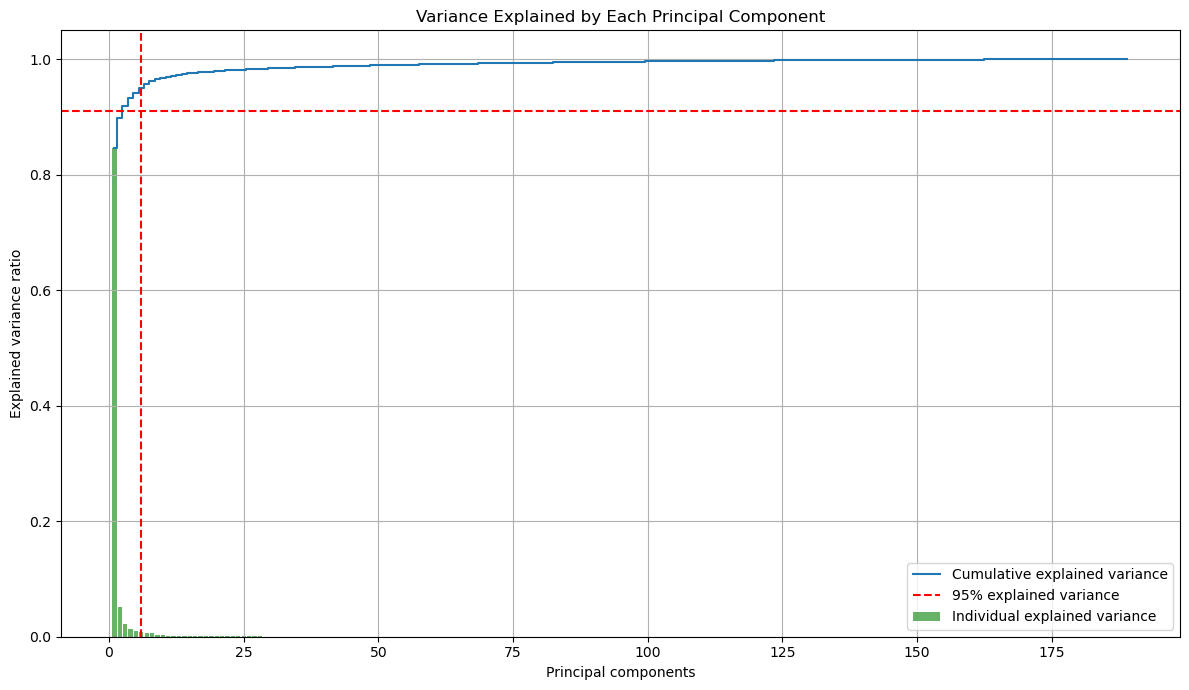

In [7]:
plt.figure(figsize=(12, 7))
plt.bar(range(1, 190), pca_original.explained_variance_ratio_[:189], alpha=0.6, align='center',
        label='Individual explained variance', color='g')
plt.step(range(1, 190), explained_variance_ratio_cumsum_original[:189], where='mid', label='Cumulative explained variance')
plt.axhline(y=0.91, color='r', linestyle='--', label="95% explained variance")
num_components_95 = (explained_variance_ratio_cumsum_original >= 0.95).argmax() + 1
plt.axvline(x=num_components_95, color='r', linestyle='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid(True)
plt.title("Variance Explained by Each Principal Component")
plt.tight_layout()
plt.show()

In [8]:
# Crear un DataFrame para mostrar la varianza explicada por cada componente
num_components = pca_original.n_components_
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, num_components + 1),
    'Explained Variance Ratio (%)': (pca_original.explained_variance_ratio_ * 100).round(2) 
})

print(explained_variance_df)

     Principal Component  Explained Variance Ratio (%)
0                      1                         84.69
1                      2                          5.09
2                      3                          2.14
3                      4                          1.33
4                      5                          0.97
..                   ...                           ...
184                  185                          0.00
185                  186                          0.00
186                  187                          0.00
187                  188                          0.00
188                  189                          0.00

[189 rows x 2 columns]


In [9]:
num_components_95 = (explained_variance_ratio_cumsum_original >= 0.95).argmax() + 1
print(f"Número de componentes para obtener la data al 95%: {num_components_95}")

Número de componentes para obtener la data al 95%: 6


In [10]:
print(pd.DataFrame(data_pca_original).head())

         0         1         2         3         4         5         6    \
0  22.534268  1.933704 -3.431860  1.004721  3.705346  0.085509  0.410870   
1  -9.788466 -0.939502 -0.830519  0.217076 -0.678605 -0.588799  0.187400   
2   3.520282 -1.517753  1.960281  0.799769  0.940299  0.403299 -0.438982   
3  27.726211 -0.600438  0.226881  0.283092  0.855707  3.765933 -0.391670   
4 -16.709339  0.567896  0.086563 -0.652859  0.618134 -0.279388  0.321869   

        7         8         9    ...       179       180       181       182  \
0 -0.051919 -0.501284  2.066128  ... -0.052074 -0.011597  0.023929  0.056889   
1 -0.215352  0.543896  0.334631  ... -0.010892  0.015235  0.042865  0.063558   
2  0.623180  0.682964  0.397277  ...  0.104274 -0.079091  0.018960 -0.087784   
3  0.693119 -1.195801  0.207994  ... -0.016744 -0.038882  0.003105 -0.056248   
4 -0.148322 -0.107481  0.121673  ...  0.023033  0.007191 -0.000019 -0.005038   

        183       184           185           186           18

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def distance(v1,v2):
    return np.linalg.norm(v1 - v2)

def Init_Centroide(data, k):
    centroides = set()
    num_pixels = data.shape[0]

    while len(centroides) < k:
        rand_index = np.random.randint(0, num_pixels)
        centroid = tuple(data[rand_index])
        centroides.add(centroid)
        centroides_iniciales = np.array(list(centroides))
    return centroides_iniciales

def return_new_centroide(grupos, data, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[grupos == i]
        if len(points_in_cluster) == 0:
            new_centroid = data[np.random.choice(data.shape[0], 1, replace=False)]
        else:
            new_centroid = np.mean(points_in_cluster, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids, dtype=object)

def get_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = [distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def distancia_promedio_centroides(old_centroide, new_centroide):
    suma_d= 0
    if old_centroide.shape != new_centroide.shape:
        raise ValueError("Las dimensiones deben coincidir")
    for i in range(old_centroide.shape[0]):
        suma_d += distance(old_centroide[i], new_centroide[i])
    return suma_d / old_centroide.shape[0]

def kmeans(data, k, umbral):
    centroides =  Init_Centroide(data, k)
    clusters   =  get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    while(distancia_promedio_centroides(centroides, new_centroides) > umbral):
        centroides = new_centroides
        clusters   =  get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)
    return new_centroides, clusters

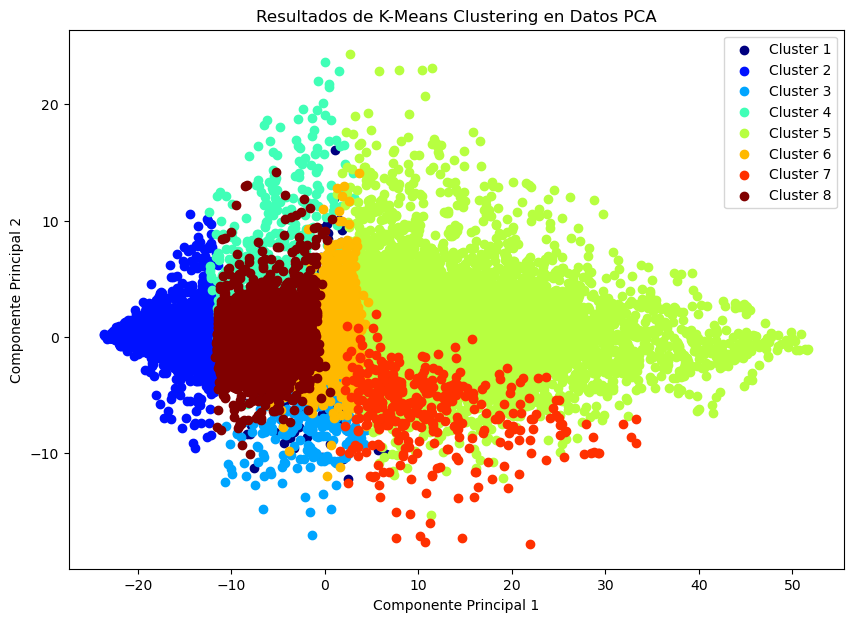

In [12]:
import pandas as pd

# Cargar el dataset reducido a 6 componentes
data_pca_6 = data_pca_original

# Ejecutar el algoritmo k-means
roids, clusters = kmeans(data_pca_6, 8, 4.5)

# Visualizar los resultados
plt.figure(figsize=(10, 7))
num_clusters = len(np.unique(clusters))
colors = plt.cm.jet(np.linspace(0, 1, num_clusters))
for cluster_id in range(num_clusters):
    plt.scatter(data_pca_6[clusters == cluster_id, 0], data_pca_6[clusters == cluster_id, 1], label=f'Cluster {cluster_id+1}', c=[colors[cluster_id]])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Resultados de K-Means Clustering en Datos PCA')
plt.show()

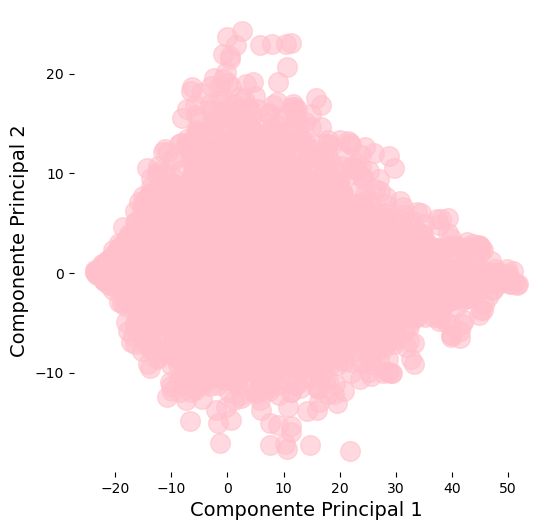

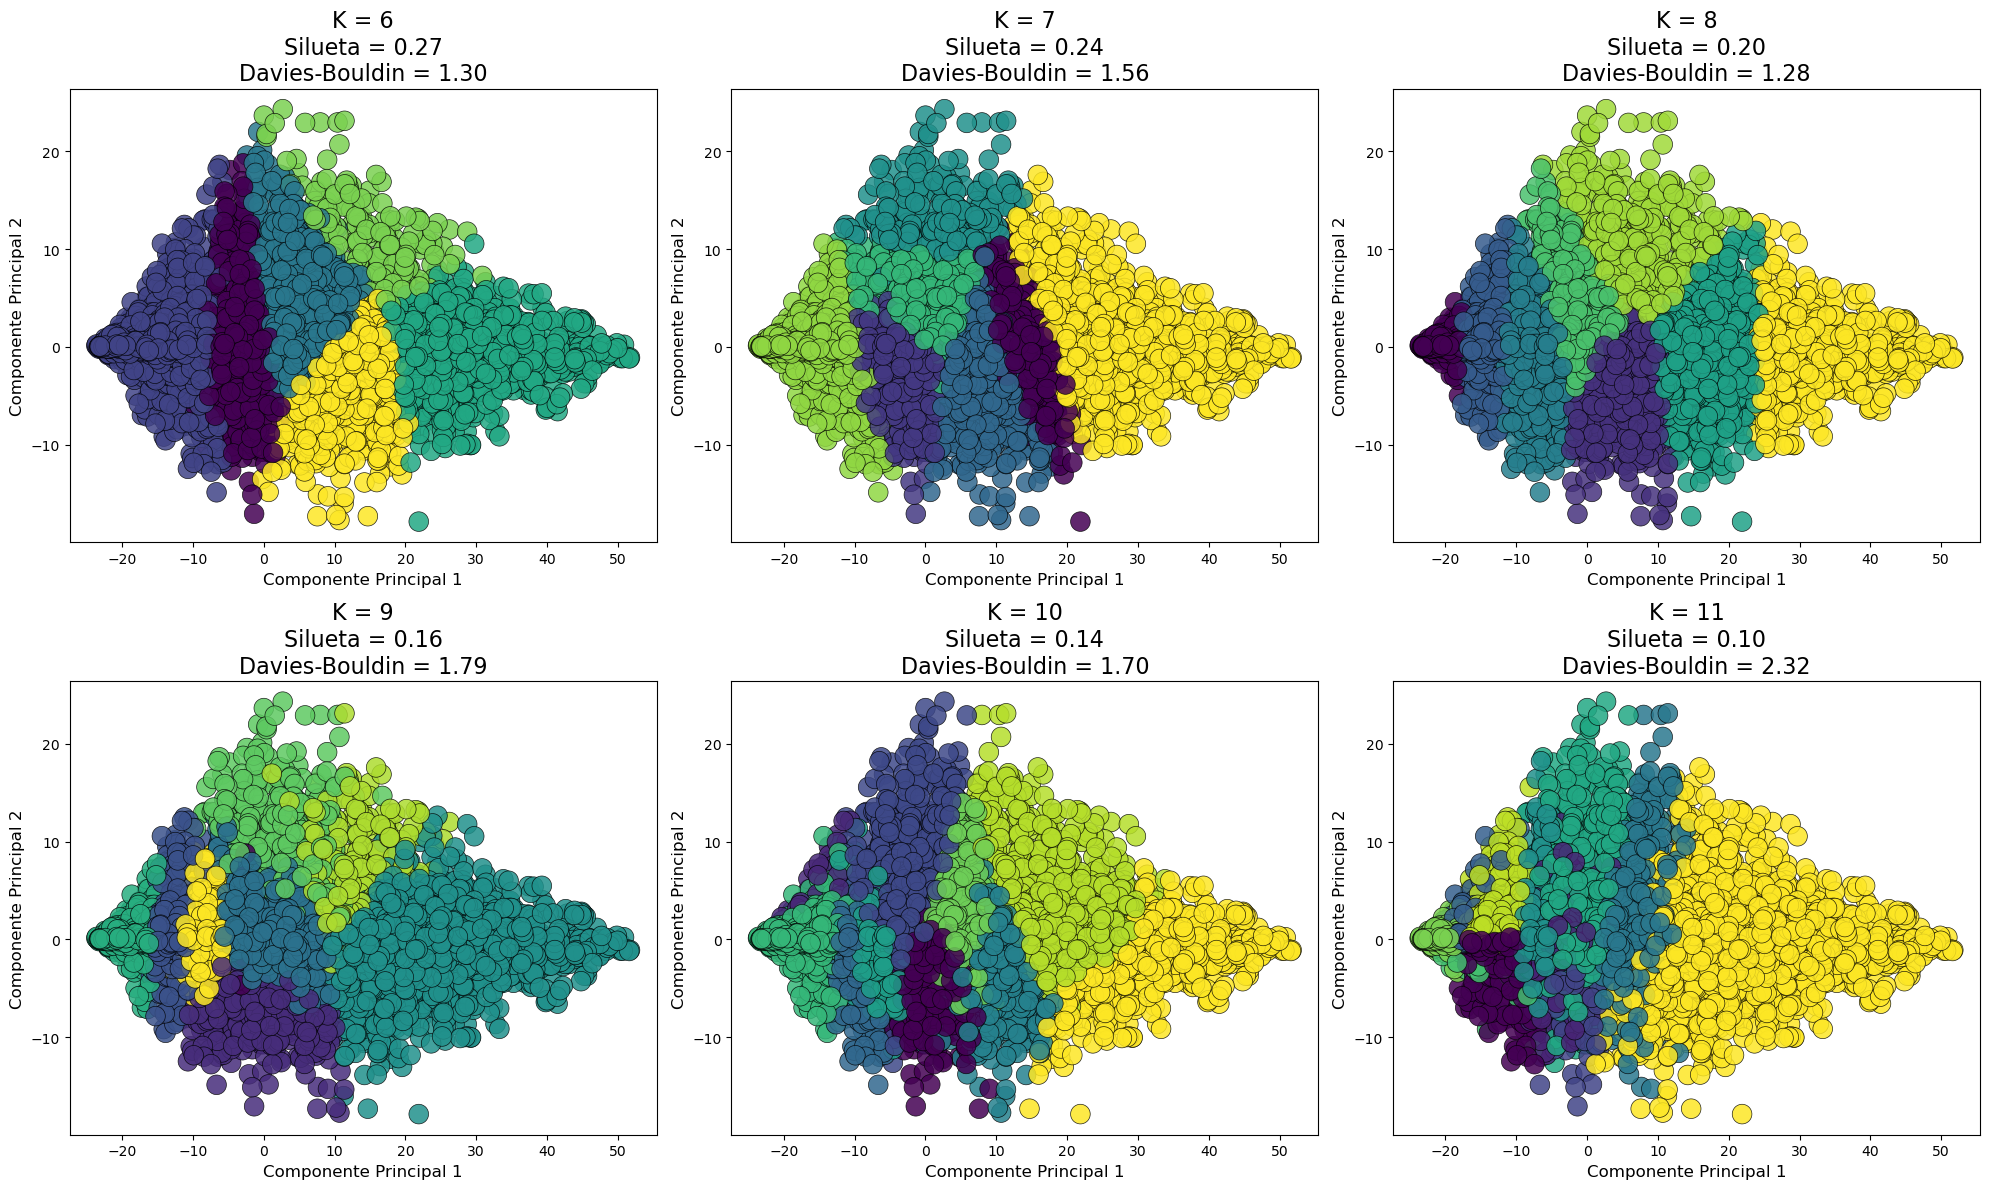

In [13]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Cargar datos
#data_pca_6 = pd.read_csv('data_pca_6_components.csv').values

# Gráfica de los datos (usando solo los dos primeros componentes)
plt.figure(figsize=(6, 6))
plt.scatter(data_pca_6[:, 0], data_pca_6[:, 1], c="pink", s=200, alpha=0.6)
plt.xlabel("Componente Principal 1", fontsize=14)
plt.ylabel("Componente Principal 2", fontsize=14)
plt.box(False)
plt.show()

# Evaluando diferentes valores de k
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for index, k in enumerate(range(6, 12)):  # Evaluando desde 6 hasta 12 clusters
    # Creación de clusters usando tu función kmeans
    roids, clusters = kmeans(data_pca_6, k, 4.5)
    
    # Cálculo de métricas 
    silueta = silhouette_score(data_pca_6, clusters)
    davies_bouldin = davies_bouldin_score(data_pca_6, clusters)
    
    # Determinar en qué subgráfico dibujar
    row = index // 3
    col = index % 3
    ax = axs[row, col]
    
    # Graficando clusters
    ax.scatter(data_pca_6[:, 0], data_pca_6[:, 1], c=clusters, s=200, edgecolors="black", linewidth=0.5, alpha=0.85)
    ax.set_title(f"K = {k}\nSilueta = {silueta:.2f}\nDavies-Bouldin = {davies_bouldin:.2f}", fontsize=16)
    ax.set_xlabel("Componente Principal 1", fontsize=12)
    ax.set_ylabel("Componente Principal 2", fontsize=12)

plt.tight_layout()
plt.show()